In [1]:
#import libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import SQL_queries as q
#set a universal style for seaborn plot backgrounds
sns.color_palette("deep")
sns.set_style('darkgrid')

# Exploratory Data Analysis - Pittsburgh Penguins Playoff Data - 2016
--------
### To begin the EDA process:
- Use a SQL query to build the first dataFrame
- Clean and organize the data
- Separate into playoff rounds by game_id for easier analysis and visualization


### [Click here to view the SQL queries used in this notebook](SQL_queries.py)

In [2]:
#connect to the database that was constructed in the create_sql_db notebook
conn = sqlite3.connect('NHL_data.db')

In [3]:
#construct the dataframe
pens_2016_playoff_df = pd.read_sql_query(q.playoff_2016_data_query, conn)
#take a look
pens_2016_playoff_df.head()

,Unnamed: 0,play_id,game_id,team_id_for,team_id_against,event,secondaryType,x,y,period,...,periodTimeRemaining,dateTime,goals_away,goals_home,play_id,game_id,player_id,playerType,firstName,lastName
0,3165356,2015030141_4,2015030141,5.0,3.0,Faceoff,None,0.0,0.0,1,...,1200.0,2016-04-14 01:10:15,0,0,2015030141_4,2015030141,8471675,Winner,Sidney,Crosby
1,3165356,2015030141_4,2015030141,5.0,3.0,Faceoff,None,0.0,0.0,1,...,1200.0,2016-04-14 01:10:15,0,0,2015030141_4,2015030141,8474613,Loser,Derek,Stepan
2,3165358,2015030141_6,2015030141,3.0,5.0,Faceoff,None,-69.0,22.0,1,...,1193.0,2016-04-14 01:10:52,0,0,2015030141_6,2015030141,8471675,Loser,Sidney,Crosby
3,3165358,2015030141_6,2015030141,3.0,5.0,Faceoff,None,-69.0,22.0,1,...,1193.0,2016-04-14 01:10:52,0,0,2015030141_6,2015030141,8474613,Winner,Derek,Stepan
4,3165359,2015030141_7,2015030141,3.0,5.0,Hit,None,-5.0,-40.0,1,...,1185.0,2016-04-14 01:11:17,0,0,2015030141_7,2015030141,8470630,Hitter,Kevin,Klein


### Next, let's explore and clean it up a little:
- take a look at columns and unique values for important categorical columns
- find and delete duplicate values
- identify null values and determine whether to drop values
- replace team_id_for and team_id_against with team name abbreviations for easier readability 

In [4]:
#view the columns
pens_2016_playoff_df.columns

Index(['Unnamed: 0', 'play_id', 'game_id', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'play_id', 'game_id', 'player_id', 'playerType',
       'firstName', 'lastName'],
      dtype='object')

In [5]:
#find and delete duplicated values
pens_2016_playoff_df = pens_2016_playoff_df.iloc[:,~pens_2016_playoff_df.columns.duplicated()]
#remove unwanted columns
pens_2016_playoff_df = pens_2016_playoff_df.drop(['Unnamed: 0','player_id'], axis=1)

In [6]:
#verify
pens_2016_playoff_df.columns

Index(['play_id', 'game_id', 'team_id_for', 'team_id_against', 'event',
       'secondaryType', 'x', 'y', 'period', 'periodType', 'periodTime',
       'periodTimeRemaining', 'dateTime', 'goals_away', 'goals_home',
       'playerType', 'firstName', 'lastName'],
      dtype='object')

In [7]:
#display values for event, secondaryType, periodType, and playerType:
print(f' Event Types: {pens_2016_playoff_df.event.unique()} \n')
print(f'Secondary Types: {pens_2016_playoff_df.secondaryType.unique()} \n')
print(f' Period Types: {pens_2016_playoff_df.periodType.unique()} \n')
print(f' Player Types: {pens_2016_playoff_df.playerType.unique()}')

 Event Types: ['Faceoff' 'Hit' 'Blocked Shot' 'Shot' 'Missed Shot' 'Giveaway' 'Penalty'
 'Takeaway' 'Goal'] 

Secondary Types: [None 'Snap Shot' 'Wrist Shot' 'Slap Shot' 'Wrap-around' 'Hooking'
 'Tip-In' 'Illegal check to head' 'Unsportsmanlike conduct' 'Interference'
 'Backhand' 'Holding' 'Tripping' 'Hi stick - double minor' 'Roughing'
 'Interference - Goalkeeper' 'Slashing' 'Cross checking' 'Fighting'
 'Boarding' 'Holding the stick' 'Hi-sticking' 'Embellishment'
 'Too many men on the ice' 'Delaying Game - Puck over glass' 'Elbowing'
 'Misconduct' 'Deflected'] 

 Period Types: ['REGULAR' 'OVERTIME'] 

 Player Types: ['Winner' 'Loser' 'Hitter' 'Hittee' 'Shooter' 'Blocker' 'Goalie'
 'PlayerID' 'PenaltyOn' 'DrewBy' 'Assist' 'Scorer' 'ServedBy']


In [8]:
#check for null values
pens_2016_playoff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13179 entries, 0 to 13178
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   play_id              13179 non-null  object 
 1   game_id              13179 non-null  int64  
 2   team_id_for          13179 non-null  float64
 3   team_id_against      13179 non-null  float64
 4   event                13179 non-null  object 
 5   secondaryType        3586 non-null   object 
 6   x                    13163 non-null  float64
 7   y                    13165 non-null  float64
 8   period               13179 non-null  int64  
 9   periodType           13179 non-null  object 
 10  periodTime           13179 non-null  int64  
 11  periodTimeRemaining  13179 non-null  float64
 12  dateTime             13179 non-null  object 
 13  goals_away           13179 non-null  int64  
 14  goals_home           13179 non-null  int64  
 15  playerType           13179 non-null 

In [9]:
#calculate what percentage of the column is null
secondary_type_percent_null_1 = (pens_2016_playoff_df['secondaryType'].isnull().sum())/len(pens_2016_playoff_df)*100
print(f'2016 Secondary Type Null Percent :{secondary_type_percent_null_1:.2f}%')

2016 Secondary Type Null Percent :72.79%


In [10]:
#identify which events have a secondary type:
pens_2016_playoff_df.dropna().event.unique()

array(['Shot', 'Penalty', 'Goal'], dtype=object)

In [11]:
#after consideration for the scope of this project, I've decided to drop the column 'secondaryType' as I will not need the specific type of penalties or shots at this time.
pens_2016_playoff_df = pens_2016_playoff_df.drop('secondaryType',axis=1)

In [12]:
#query the NHL database for all team numbers and their associated abbreviations
team_ids_df = pd.read_sql_query(q.get_abb_query, conn)
#create a dictionary from the abbreviation df
abb_dict = pd.Series(team_ids_df.abbreviation.values,index=team_ids_df.team_id).to_dict()
#replace row values in the dataframe with values from the dictionary
pens_2016_playoff_df = pens_2016_playoff_df.replace({'team_id_for':abb_dict})
pens_2016_playoff_df = pens_2016_playoff_df.replace({'team_id_against':abb_dict})
pens_2016_playoff_df = pens_2016_playoff_df.rename(columns={'team_id_for':'team_for', 'team_id_against':'team_against'})

In [13]:
#confirm replacement
pens_2016_playoff_df.head()

,play_id,game_id,team_for,team_against,event,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,playerType,firstName,lastName
0,2015030141_4,2015030141,PIT,NYR,Faceoff,0.0,0.0,1,REGULAR,0,1200.0,2016-04-14 01:10:15,0,0,Winner,Sidney,Crosby
1,2015030141_4,2015030141,PIT,NYR,Faceoff,0.0,0.0,1,REGULAR,0,1200.0,2016-04-14 01:10:15,0,0,Loser,Derek,Stepan
2,2015030141_6,2015030141,NYR,PIT,Faceoff,-69.0,22.0,1,REGULAR,7,1193.0,2016-04-14 01:10:52,0,0,Loser,Sidney,Crosby
3,2015030141_6,2015030141,NYR,PIT,Faceoff,-69.0,22.0,1,REGULAR,7,1193.0,2016-04-14 01:10:52,0,0,Winner,Derek,Stepan
4,2015030141_7,2015030141,NYR,PIT,Hit,-5.0,-40.0,1,REGULAR,15,1185.0,2016-04-14 01:11:17,0,0,Hitter,Kevin,Klein


### Now that the DataFrame is cleaned up, I want to separate the data into the following rounds:
<center>2016 Playoffs</center>

| Round | Opponent   |         |
|---|---------------------|
| 1 | New York Rangers    |
| 2 | Washington Capitals |
| 3 | Tampa Bay Lightning |
| Final | San Jose Sharks     | 

To accomplish this, I'll have to groupby 'game_id', and do a little data wrangling with the team names

In [14]:
#group by game_id
games_teams_2016 = pens_2016_playoff_df.groupby('game_id').team_for.unique().reset_index()
#display current state
games_teams_2016.head()

,game_id,team_for
0,2015030141,"[PIT, NYR]"
1,2015030142,"[NYR, PIT]"
2,2015030143,"[PIT, NYR]"
3,2015030144,"[NYR, PIT]"
4,2015030145,"[PIT, NYR]"


In [15]:
#remove PIT, and show only the opposing team:
games_teams_2016['opposing_team'] = games_teams_2016['team_for'].apply(
    lambda row: [val for val in row if val != 'PIT']
)
#remove defunct column
games_teams_2016.drop('team_for',axis=1, inplace=True)
#display new state:
games_teams_2016.head()

,game_id,opposing_team
0,2015030141,[NYR]
1,2015030142,[NYR]
2,2015030143,[NYR]
3,2015030144,[NYR]
4,2015030145,[NYR]


In [16]:
#isolate the team name, since it is a list and a string is needed:
games_teams_2016['opposing_team'] = games_teams_2016['opposing_team'].str[0]
#show how many games per team:
games_teams_2016['opposing_team'].value_counts()

opposing_team
TBL    7
WSH    6
SJS    6
NYR    5
Name: count, dtype: int64

In [17]:
#create a list of game_ids for each playoff round:
NYR_2016_games = list(games_teams_2016[games_teams_2016['opposing_team']=='NYR'].game_id)
WSH_2016_games = list(games_teams_2016[games_teams_2016['opposing_team']=='WSH'].game_id)
TBL_2016_games = list(games_teams_2016[games_teams_2016['opposing_team']=='TBL'].game_id)
SJS_2016_games = list(games_teams_2016[games_teams_2016['opposing_team']=='SJS'].game_id)

In [18]:
#use the lists above to filter into rounds:
Round_1_2016 = pens_2016_playoff_df[pens_2016_playoff_df['game_id'].isin(NYR_2016_games)]
Round_2_2016 = pens_2016_playoff_df[pens_2016_playoff_df['game_id'].isin(WSH_2016_games)]
Round_3_2016 = pens_2016_playoff_df[pens_2016_playoff_df['game_id'].isin(TBL_2016_games)]
Round_4_2016 = pens_2016_playoff_df[pens_2016_playoff_df['game_id'].isin(SJS_2016_games)]
#create a list of all rounds for help with visuals
All_rounds_2016 = [Round_1_2016,Round_2_2016,Round_3_2016,Round_4_2016]

In [19]:
#add a roundNumber column to the dataFrames
i=1
for round_df in All_rounds_2016:
    round_df = round_df.copy()
    round_df.loc[:,'roundNumber'] = i
    i+=1

In [20]:
#verify proper addition
print(Round_1_2016.columns, Round_4_2016.columns)

Index(['play_id', 'game_id', 'team_for', 'team_against', 'event', 'x', 'y',
       'period', 'periodType', 'periodTime', 'periodTimeRemaining', 'dateTime',
       'goals_away', 'goals_home', 'playerType', 'firstName', 'lastName'],
      dtype='object') Index(['play_id', 'game_id', 'team_for', 'team_against', 'event', 'x', 'y',
       'period', 'periodType', 'periodTime', 'periodTimeRemaining', 'dateTime',
       'goals_away', 'goals_home', 'playerType', 'firstName', 'lastName'],
      dtype='object')


### Now that we have the data sorted into rounds, let's calculate some initial player stats per playoff round:
- Faceoff Differential
- Penalty Differential


#### To continue the analysis, we'll need to filter to only show Penguins' players
- use a csv file containing the roster for 2016
- separate good and bad plays to determine which player to filter on (team_against or team_for)

In [21]:
#load the roster into a df
Pens_2016_roster = pd.read_csv('Pens_2016_roster.csv')
#replace special characters to match db spelling
Pens_2016_roster['Player'] = Pens_2016_roster['Player'].replace({r'\(C\)': '', '-': '', 'ö': 'o', 'ä': 'a', 'ü': 'u'}, regex=True).str.strip()
#split Player (full name) into first and last names
Pens_2016_roster[['firstName', 'lastName']] = Pens_2016_roster['Player'].str.split(expand=True)
#create a roster list by last name
Pens_2016_roster_list = list(Pens_2016_roster['lastName'])

## First, let's take a look at Faceoff differentials and how they changed over the course of the 2016 Playoffs

### Faceoff Differential in Hockey

Faceoff differential is a critical metric in hockey that measures a player's effectiveness in winning faceoffs compared to their opponents. Faceoffs are pivotal moments during a game, often determining puck possession and control. This metric is calculated by taking the ratio of faceoffs won (Winner) to the total faceoffs (Winner + Loser) for each player.

### Importance of Faceoff Differential

Faceoff wins contribute directly to a team's ability to control the puck and initiate offensive plays. Players with a positive faceoff differential excel in gaining possession for their team, leading to increased scoring opportunities and defensive stability. Faceoff specialists are particularly valuable during critical moments, such as power plays and penalty kills.

### Plot Interpretation

The line plot below illustrates the faceoff differentials for the top 5 players across the four playoff rounds in the 2016 hockey season. Each line represents a player, with the x-axis denoting the playoff rounds (1 to 4), and the y-axis representing the normalized faceoff differential. The legend displays each player's name along with their average faceoff differential over the four rounds.

### Calculation Methodology

Faceoff differentials were calculated for each player by analyzing two types of faceoffs: faceoffs won (Winner) and faceoffs lost (Loser). The formula used is as follows:

**Faceoff Differential = Faceoffs Won \ (Faceoffs Won + Faceoffs Lost)**

To normalize the faceoff differential, the calculated values were averaged over the four playoff rounds, providing a per-round metric. This normalization accounts for variations in the number of games played by each player across the playoff rounds.

### Observations

- Players with positive differentials excel in winning faceoffs and contributing to their team's overall control of the game.
- Negative differentials may suggest areas for improvement in faceoff skills.

This analysis aims to provide insights into each player's impact during faceoff situations and their contribution to team success.


In [22]:
#function to calculate faceoff wins or losses:
def calculate_faceoffs(round_df, player_type):
    faceoffs = round_df[round_df['playerType'] == player_type]
    faceoffs = faceoffs.groupby('lastName')['playerType'].value_counts().reset_index(name=f'count_{player_type}')
    return faceoffs

#function to calculate faceoff differential for a given round
def calculate_faceoff_stats(wins, losses):
    faceoff_stats = wins.merge(losses, on='lastName', how='left') 
    #drop rows with null values
    faceoff_stats = faceoff_stats.dropna(subset=['count_Winner', 'count_Loser'])
    #calculate faceoff differential
    faceoff_stats['Differential'] = faceoff_stats['count_Winner'] / (faceoff_stats['count_Winner']+ faceoff_stats['count_Loser'])
    return faceoff_stats


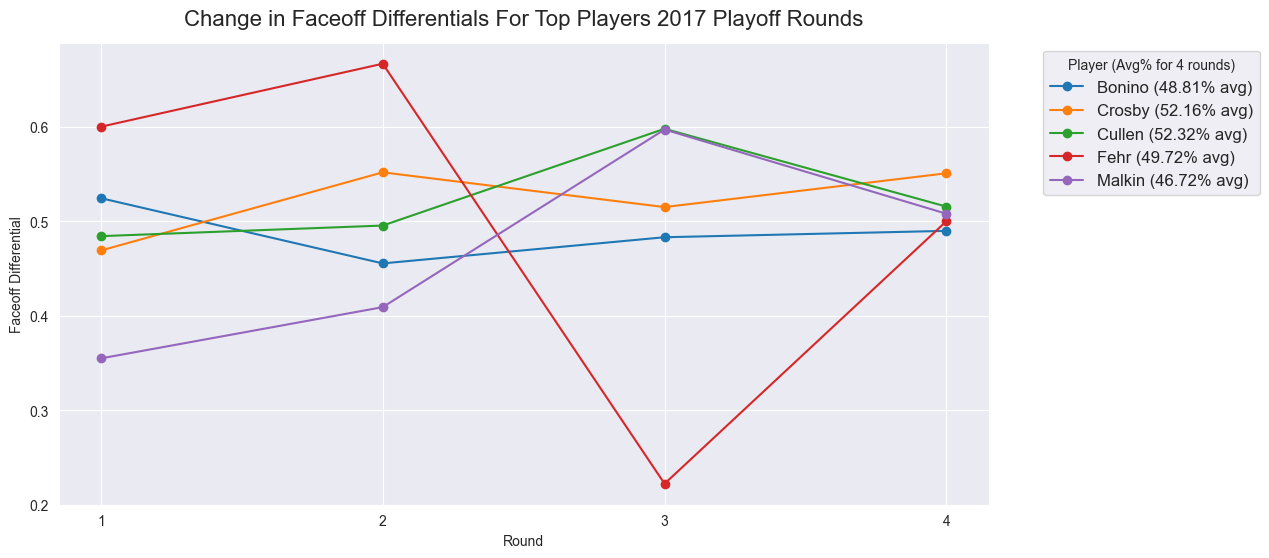

In [23]:
#store all faceoff differentials
all_stats_all_rounds = pd.DataFrame()

#store the number of points for each player
player_points = {}

#iterate through the rounds
for i, round_df in enumerate(All_rounds_2016, start=1):
    round_name = f'Round_{i}'

    #calculate faceoff wins and losses
    wins = calculate_faceoffs(round_df, 'Winner')
    losses = calculate_faceoffs(round_df, 'Loser')

    #calculate faceoff stats
    faceoff_stats = calculate_faceoff_stats(wins, losses)

    #filter faceoff_stats for players in the roster list
    faceoff_stats_filtered = faceoff_stats[faceoff_stats['lastName'].isin(Pens_2016_roster_list)].copy()

    #add a column for the round number using .loc
    faceoff_stats_filtered.loc[:, 'round_number'] = i

    #concatenate faceoff stats for the current round to the overall dataframe
    all_stats_all_rounds = pd.concat([all_stats_all_rounds, faceoff_stats_filtered], ignore_index=True)

    #update player_points dictionary
    for player in faceoff_stats_filtered['lastName'].unique():
        player_points[player] = player_points.get(player, 0) + 1

#get unique players with at least two points
players_with_two_points = [player for player, points in player_points.items() if points >= 2]

#filter faceoff stats for players with at least two points
all_stats_all_rounds_filtered = all_stats_all_rounds[all_stats_all_rounds['lastName'].isin(players_with_two_points)]

#create a consistent color mapping for players
player_color_mapping = {player: sns.color_palette()[i] for i, player in enumerate(players_with_two_points)}

#sort players to ensure consistency in legend order
players_with_two_points_sorted = sorted(players_with_two_points)

#plot the change in faceoff differentials over time
plt.figure(figsize=(12, 6))

for player in players_with_two_points_sorted:
    player_data = all_stats_all_rounds_filtered[all_stats_all_rounds_filtered['lastName'] == player]
    avg_diff = player_data['Differential'].mean()
    
    plt.plot(
        player_data['round_number'],
        player_data['Differential'],
        label=f'{player} ({avg_diff:.2%} avg)',
        color=player_color_mapping[player],
        marker='o',  
        linestyle='-',  
    )

#modify x-axis to show only integers 1-4
plt.xticks(range(1, 5))

plt.title('Change in Faceoff Differentials For Top Players 2017 Playoff Rounds', fontsize=16, y=1.02)
plt.xlabel('Round')
plt.ylabel('Faceoff Differential')
plt.legend(title='Player (Avg% for 4 rounds)', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.show()


The visual representation illustrates that while Nick Bonino did not boast the highest overall faceoff win percentage throughout the playoffs, his consistency stood out as he maintained a success rate close to 50% across different rounds. This steadfast performance showcases his reliability in faceoffs throughout the playoff stages.

In a notable observation, Sidney Crosby secured the second-highest Faceoff differential. This is particularly significant considering his role as the primary center (#1 C), implying that he faced a substantial number of faceoffs. Crosby's prowess in this aspect adds another layer to his overall contribution on the ice.

## Next, take a look at Penalties

### Penalty Differential in Hockey

Penalty differential is a metric that quantifies a player's impact on penalties during a game. It is calculated by taking the difference between the number of penalties drawn (DrewBy) and the number of penalties taken (PenaltyOn) by a player. A positive penalty differential indicates that a player draws more penalties than they take, while a negative value suggests the opposite.

### Importance of Penalty Differential

Penalty differential is a crucial consideration as it reflects a player's ability to create power-play opportunities for their team while minimizing time spent shorthanded. Players with a positive penalty differential contribute to their team's offensive advantage, putting additional pressure on the opposing team. On the other hand, a negative penalty differential may indicate a player who takes more penalties than they draw, potentially putting their team at a disadvantage.

### Plot Interpretation

The line plot below illustrates the penalty differentials for the top 5 players across the four playoff rounds in the 2016 hockey season. Each line represents a player, with the x-axis denoting the playoff rounds (1 to 4), and the y-axis representing the normalized penalty differential. The legend displays each player's name along with their total penalty differential over the four rounds.

### Calculation Methodology

Penalty differentials were calculated for each player by analyzing two types of penalties: penalties drawn (DrewBy) and penalties taken (PenaltyOn). The formula used is as follows:

**Penalty Differential = Penalties Drawn - Penalties Taken**

To normalize the penalty differential, the calculated values were divided by the total number of games played by each player to provide a per-round metric. This normalization accounts for variations in the number of games played by each player across the playoff rounds.

### Observations

- Positive values indicate players who contribute positively to their team by drawing more penalties than they take.
- Negative values suggest players who may need to minimize their penalty-taking tendencies.

This analysis aims to provide insights into player discipline and their impact on team performance during the playoffs.


In [24]:
player_games_played = {}

#iterate through each round's dataframe
for round_df in All_rounds_2016:
    #extract unique game IDs for each player
    games_played_per_player = round_df.groupby('lastName')['game_id'].nunique().reset_index(name='gamesPlayed')

    #update the dictionary with the total games played for each player
    for index, row in games_played_per_player.iterrows():
        player = row['lastName']
        games_played = row['gamesPlayed']

        player_games_played[player] = player_games_played.get(player, 0) + games_played


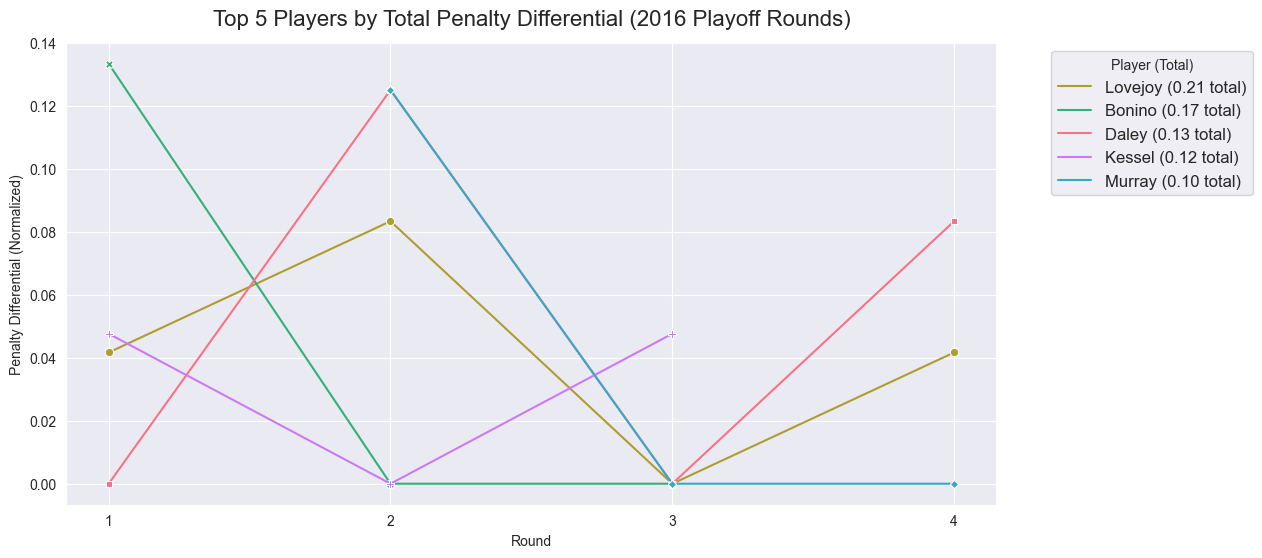

In [25]:
all_penalty_stats_all_rounds = pd.DataFrame()

#store the total penalty differential for each player
player_total_penalty_diff = {}

for i, round_df in enumerate(All_rounds_2016, start=1):
    #calculate penalty differentials
    penalties_on = round_df[round_df['playerType'] == 'PenaltyOn'].groupby('lastName').size().reset_index(name='PenaltiesOn')
    penalties_by = round_df[round_df['playerType'] == 'DrewBy'].groupby('lastName').size().reset_index(name='PenaltiesBy')

    penalty_stats = pd.merge(penalties_on, penalties_by, how='outer', left_on='lastName', right_on='lastName')
    penalty_stats['PenaltiesBy'].fillna(0, inplace=True)
    penalty_stats['Differential'] = penalty_stats['PenaltiesOn'] - penalty_stats['PenaltiesBy']

    #filter penalty_stats for players in the roster list
    penalty_stats_filtered = penalty_stats[penalty_stats['lastName'].isin(Pens_2016_roster_list)].copy()

    #add a column for the round number
    penalty_stats_filtered.loc[:, 'round_number'] = i

    #handle NaN values and division by zero
    penalty_stats_filtered['Differential'] = penalty_stats_filtered['Differential'].fillna(0)
    penalty_stats_filtered['Differential'] /= penalty_stats_filtered['lastName'].map(player_games_played).replace(0, 1)

    #concatenate penalty stats for the current round to the overall dataframe
    all_penalty_stats_all_rounds = pd.concat([all_penalty_stats_all_rounds, penalty_stats_filtered], ignore_index=True)

    #update player_total_penalty_diff dictionary
    for player, diff in zip(penalty_stats_filtered['lastName'], penalty_stats_filtered['Differential']):
        player_total_penalty_diff[player] = player_total_penalty_diff.get(player, 0) + diff

#get the top 5 players by total penalty differential (excluding NaN values)
top_5_players = sorted(player_total_penalty_diff, key=player_total_penalty_diff.get, reverse=True)[:5]

#filter penalty stats for the top 5 players
all_penalty_stats_all_rounds_filtered = all_penalty_stats_all_rounds[all_penalty_stats_all_rounds['lastName'].isin(top_5_players)]

#create a larger color palette for players
larger_palette = sns.color_palette("husl", n_colors=len(top_5_players))

#create a consistent color mapping for players
player_penalty_color_mapping = {player: larger_palette[i] for i, player in enumerate(top_5_players)}

#plot the penalty differentials over time using seaborn
plt.figure(figsize=(12, 6))
penalty_plot = sns.lineplot(
    data=all_penalty_stats_all_rounds_filtered,
    x='round_number',
    y='Differential',
    hue='lastName',
    palette=player_penalty_color_mapping,
    style='lastName',
    markers=True,
    dashes=False,
)

#modify x-axis to show only integers 1-4
plt.xticks(range(1, i + 1))

#add total penalty differential to the legend with appropriate line styles
penalty_legend_labels = []
for player, line_style in zip(top_5_players, penalty_plot.lines):
    total_diff = player_total_penalty_diff[player]
    penalty_legend_labels.append(f'{player} ({total_diff:.2f} total)')

#explicitly set the line styles in the legend
penalty_legend = plt.legend(
    penalty_legend_labels,
    title='Player (Total)',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=12,
)

#get the handles for the lines in the plot
handles, _ = penalty_plot.get_legend_handles_labels()

#create a list of Line2D objects
line2d_objects = [plt.Line2D([0], [0], color=handle.get_color(), linestyle='-', linewidth=handle.get_linewidth()) for handle in handles]

#update the line styles in the legend
for line, style in zip(line2d_objects, penalty_legend.legend_handles):
    style.set_linestyle('-')  # Set the desired line style here

#update the legend
penalty_legend = plt.legend(
    line2d_objects,
    penalty_legend_labels,
    title='Player (Total)',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=12,
)

plt.title('Top 5 Players by Total Penalty Differential (2016 Playoff Rounds)', fontsize=16, y=1.02)
plt.xlabel('Round')
plt.ylabel('Penalty Differential (Normalized)')
plt.show()

**Analysis**  
Exploring the penalty differentials of notable players during the 2016 playoffs sheds light on their impact on the game. In line with expectations, two prominent players from our study emerge within the top five performers in penalty differentials. This aligns with the anticipation that standout players would showcase their skills not only in offensive and defensive aspects but also in managing penalties effectively.

**Hypothesis**  
Considering the anticipated presence of star players in the top ranks of penalty differentials, a plausible hypothesis is that their skill set extends beyond conventional metrics. These players, recognized for their comprehensive contributions, are expected to navigate the physicality of the game adeptly. Their ability to excel in penalty differentials reinforces the hypothesis that star players possess a well-rounded approach to the game.

**Conclusion**  
In conclusion, the alignment of star players with high penalty differentials in the top ranks supports the notion that exceptional players excel in various facets of the game. The hypothesis that star players contribute significantly to penalty differentials finds validation in the analysis of the 2016 playoffs, emphasizing the multifaceted nature of their impact on team dynamics.


## Let's sort the good and bad plays to visualize events for the HBK line throughout the season

In [26]:
#function to sort good and bad plays
def sort_good_bad_plays(df):
    good_plays_df = df.loc[((df['playerType'].isin(['Hitter','Blocker','Scorer','Shooter'])) | (df['event']=='Takeaway'))]
    bad_plays_df = df.loc[(df['playerType'].isin(['Hittee','Shooter','DrewBy'])) | (df['event']=='Giveaway')]
    return good_plays_df, bad_plays_df

In [27]:
#sort all rounds into good and bad plays
Round_1_2016_good_plays, Round_1_2016_bad_plays = sort_good_bad_plays(Round_1_2016)
Round_2_2016_good_plays, Round_2_2016_bad_plays = sort_good_bad_plays(Round_2_2016)
Round_3_2016_good_plays, Round_3_2016_bad_plays = sort_good_bad_plays(Round_3_2016)
Round_4_2016_good_plays, Round_4_2016_bad_plays = sort_good_bad_plays(Round_4_2016)

In [28]:
#filter to only show Penguins players
Round_1_2016_good_plays = Round_1_2016_good_plays[Round_1_2016_good_plays['lastName'].isin(Pens_2016_roster_list)]
Round_1_2016_bad_plays = Round_1_2016_bad_plays[Round_1_2016_bad_plays['lastName'].isin(Pens_2016_roster_list)]

Round_2_2016_good_plays = Round_2_2016_good_plays[Round_2_2016_good_plays['lastName'].isin(Pens_2016_roster_list)]
Round_2_2016_bad_plays = Round_2_2016_bad_plays[Round_2_2016_bad_plays['lastName'].isin(Pens_2016_roster_list)]

Round_3_2016_good_plays = Round_3_2016_good_plays[Round_3_2016_good_plays['lastName'].isin(Pens_2016_roster_list)]
Round_3_2016_bad_plays = Round_3_2016_bad_plays[Round_3_2016_bad_plays['lastName'].isin(Pens_2016_roster_list)]

Round_4_2016_good_plays = Round_4_2016_good_plays[Round_4_2016_good_plays['lastName'].isin(Pens_2016_roster_list)]
Round_4_2016_bad_plays = Round_4_2016_bad_plays[Round_4_2016_bad_plays['lastName'].isin(Pens_2016_roster_list)]

good_plays_2016_all_rounds = [Round_1_2016_good_plays,Round_2_2016_good_plays,Round_3_2016_good_plays,Round_4_2016_good_plays]
bad_plays_2016_all_rounds = [Round_1_2016_bad_plays,Round_2_2016_bad_plays,Round_3_2016_bad_plays,Round_4_2016_bad_plays]

In [29]:
#take a look at the playerType values:
good_player_types = Round_1_2016_good_plays.playerType.unique()
bad_player_types = Round_1_2016_bad_plays.playerType.unique()
print(f'good player types:{good_player_types}\nbad player types:{bad_player_types}\n')
#leave takeaways/giveaways separate for now:
good_player_types = np.delete(good_player_types,4,0)
bad_player_types  = np.delete(bad_player_types,2,0)
#verify deletion:
print(f'corrected good player types:{good_player_types}\ncorrected bad player types:{bad_player_types}')

good player types:['Shooter' 'Hitter' 'Blocker' 'Scorer' 'PlayerID']
bad player types:['Hittee' 'Shooter' 'PlayerID' 'DrewBy']

corrected good player types:['Shooter' 'Hitter' 'Blocker' 'Scorer']
corrected bad player types:['Hittee' 'Shooter' 'DrewBy']


#### The function below uses a hockey rink image in the background to easily visualize plays given their coordinates

In [66]:
def plotHockeyPoints_all_rounds(round_dfs, column, column_filter, players_of_interest):
    """
    Plot play points on the ice for all rounds, differentiating colors for each dataframe.

    :param round_dfs: List of DataFrames for each round
    :param column: This is the category that you are plotting on
    :param column_filter: Choose a way to filter the category
    :param players_of_interest: List of players to include
    :return: An image of the x, y coordinates for each play fitting the filter, overlayed on a hockey rink.
    """
    #combine all rounds into a single DataFrame
    combined_df = pd.concat(round_dfs)

    plt.figure(figsize=(10, 8))

    #filter the combined DataFrame
    scatter_data = combined_df.loc[(combined_df[column] == column_filter) & (combined_df['lastName'].isin(players_of_interest))]
    
    sns.color_palette("deep")
    fig = sns.scatterplot(x='x', y='y', data=scatter_data, hue='lastName')

    plt.title(f'Location of {column_filter}s')
    im = plt.imread("rink.jpg")
    im = fig.imshow(im, extent=[-105, 105, -45.5, 45.5])
    plt.xlabel('')
    plt.ylabel('')
    fig.set(xticklabels=[])
    fig.set(yticklabels=[])
    fig.grid(False)

    #count occurrences of each player in the legend
    player_counts = scatter_data['lastName'].value_counts().to_dict()

    #get legend handles and labels
    handles, labels = fig.get_legend_handles_labels()

    #modify legend labels to include counts, handle cases where player is not in player_counts
    legend_labels = [f'{label} ({player_counts.get(label, 0)})' for label in labels]
    fig.legend(handles, legend_labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.show()
    plt.close()

### First, visualize the good plays for the HBK line:
- Shots on net
- Hits
- Blocked goals
- Goals

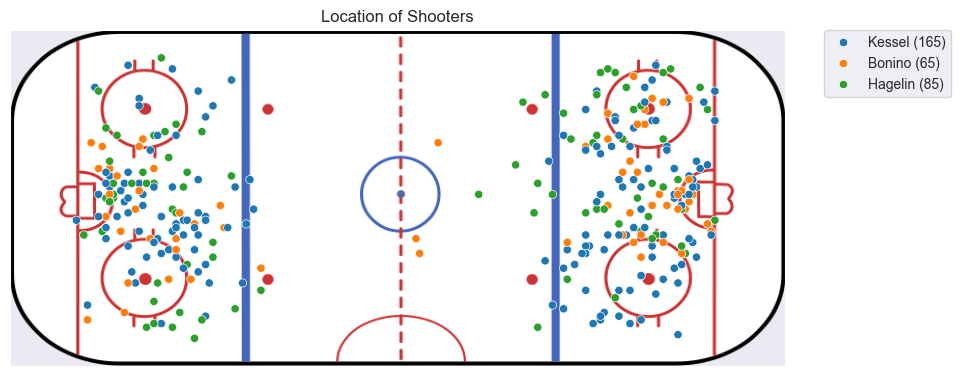

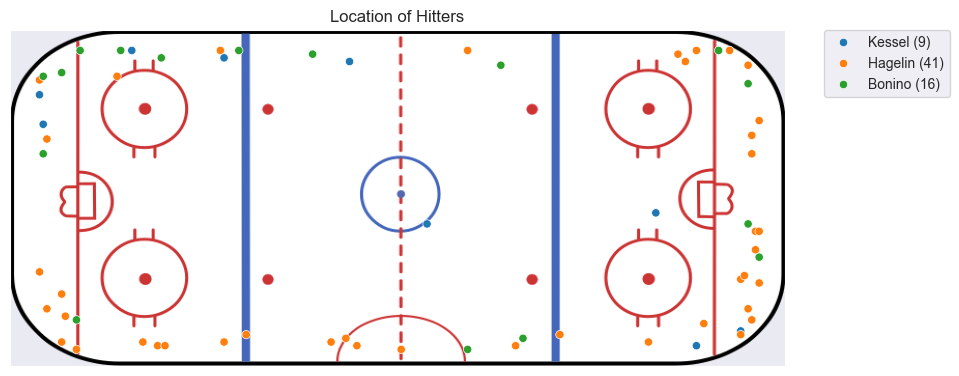

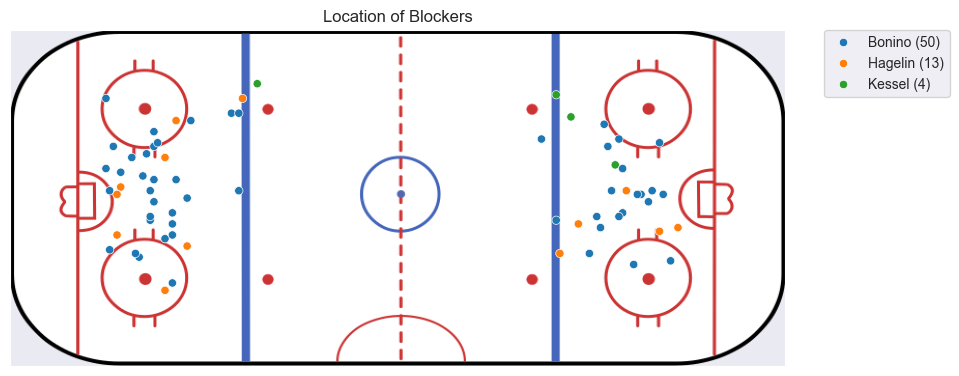

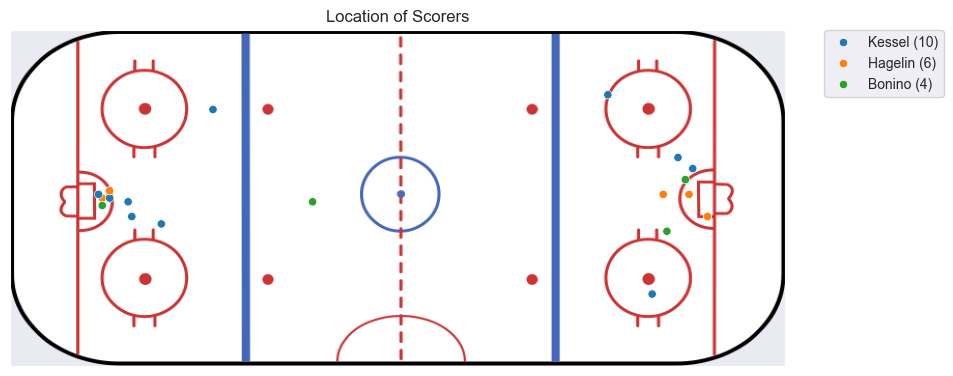

In [67]:
#graphs location and number of good plays for the HBK line 
for type in good_player_types:
    plotHockeyPoints_all_rounds(good_plays_2016_all_rounds, column='playerType', column_filter=type, players_of_interest=['Hagelin', 'Bonino', 'Kessel'])

Evident from the visual representations above, the 2016 playoffs illustrate Phil Kessel's dominance within the line, leading in both shots and goals. In contrast, Carl Hagelin excels in the physical aspect of the game, contributing significantly with the highest number of hits. Notably, Nick Bonino emerges as a defensive stalwart, blocking a considerably higher number of shots compared to the rest of the line. 

This distribution of roles creates a well-balanced trio. While it's customary for the Center, Bonino in this case, to primarily block shots on net, the unique dynamic here is that, unlike traditional expectations, Bonino takes fewer shots, with Kessel emerging as the primary shooter with a substantial lead.

### Now for the 'bad' plays for the HBK line
- Hittee (recipient of a hit)
- Shooter (of a blocked shot - failed scoring attempt)
- DrewBy (drew a penalty, thus resulting in the opposing team's power play)

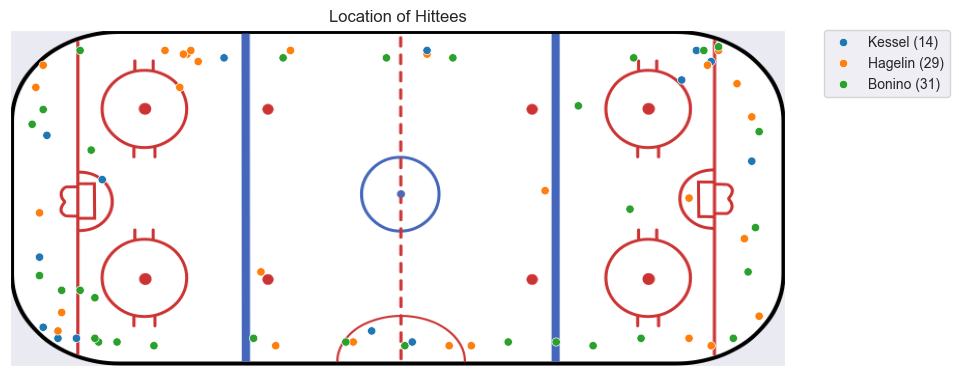

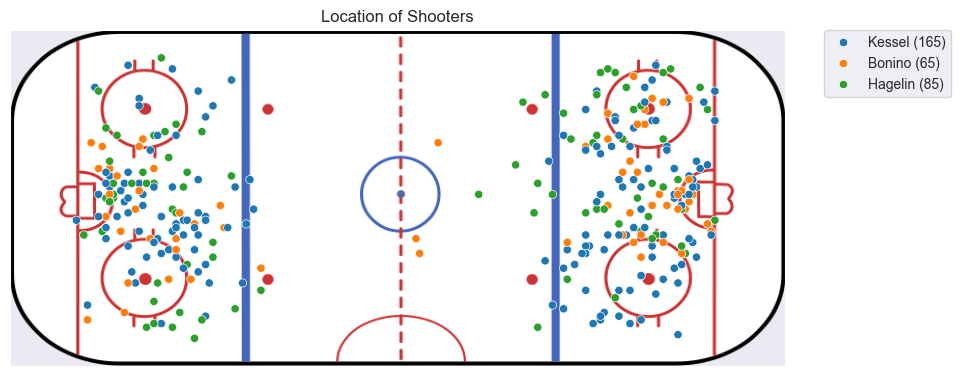

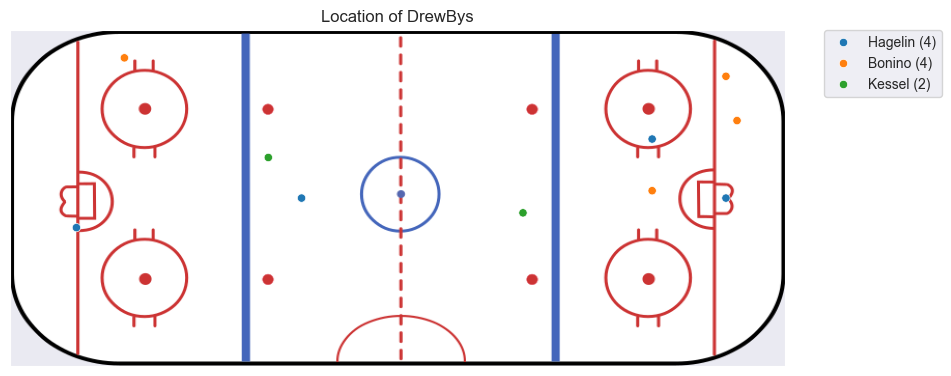

In [68]:
for type in bad_player_types:
    plotHockeyPoints_all_rounds(bad_plays_2016_all_rounds, column='playerType', column_filter=type, players_of_interest=['Hagelin', 'Bonino', 'Kessel'])

Unsurprisingly, Phil Kessel leads in the count of blocked shots, a natural outcome given his high volume of overall shots. Similarly, Carl Hagelin, being the most active in delivering hits within the line, logically receives the most hits, emphasizing his robust physical presence and aggressive playing style on the ice.

All three players drew minimal penalties throughout the playoffs, underscoring their ability to maintain a strong and disciplined play style while adhering to the rules.

### Last, let's look at Takeaways and Giveaways

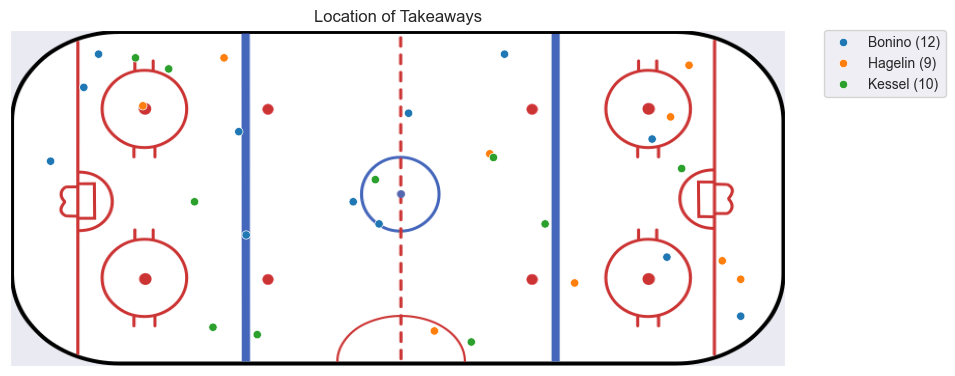

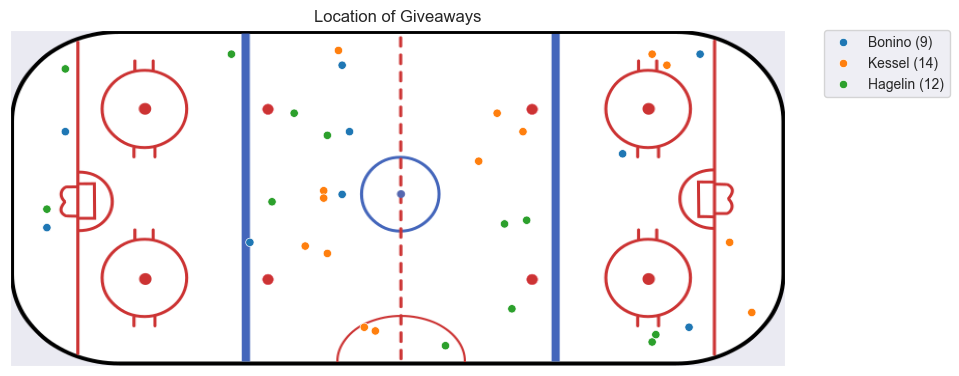

In [69]:
plotHockeyPoints_all_rounds(good_plays_2016_all_rounds, column='event', column_filter='Takeaway', players_of_interest=['Hagelin', 'Bonino', 'Kessel'])
plotHockeyPoints_all_rounds(bad_plays_2016_all_rounds, column='event', column_filter='Giveaway', players_of_interest=['Hagelin', 'Bonino', 'Kessel'])

Bonino emerges as the HBK line leader with the highest number of takeaways and the fewest giveaways. 

The significance of these metrics in a playoff context remains somewhat challenging to assess, given the proximity of the numbers over an extended period of many games. A more in-depth investigation on a game-by-game basis could offer valuable insights and serve as a compelling avenue for future research projects.

## Next, let's get into some more advanced stats and success metrics
### We'll use two dataFrames:
- The first, with more basic stats, has the advantage of being broken down into games to eventually group by round if needed
- The second has complex stats for the entire playoff season

#### To combine the two initially for a great overall understanding, we can aggregate the first dF by player and merge it with the second.

In [34]:
#SQL query from NHL_db
pens_2016_playoff_skater_stats_basic = pd.read_sql_query(q.skater_stats_2016_query,conn)

In [35]:
#view the columns for an overview of the table
pens_2016_playoff_skater_stats_basic.columns

Index(['game_id', 'player_id', 'team_id', 'timeOnIce', 'assists', 'goals',
       'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce',
       'firstName', 'lastName', 'primaryPosition', 'abbreviation'],
      dtype='object')

In [36]:
#remove unwanted columns
pens_2016_playoff_skater_stats_basic = pens_2016_playoff_skater_stats_basic.drop(['player_id','team_id'], axis=1)

#### Form the aggregated dataframe to prepare for a merge

In [37]:
#group by player last name, aggregate appropriately the statistics for the entire season
players_2016_sums_df = pens_2016_playoff_skater_stats_basic.groupby('lastName').aggregate({'goals':'sum', 'assists':'sum', 'plusMinus':'sum', 'hits':'sum', 'game_id':'count', 'timeOnIce':'mean', 'shots':'sum', 'takeaways':'sum','giveaways':'sum','blocked':'sum'}).reset_index()

### Now let's put together the advanced stats dataframe

In [38]:
#form a dataFrame from a csv file sourced from hockey-reference.com containing advanced player stats for the 2016 playoffs
pens_2016_playoff_skater_stats_adv = pd.read_csv('2016_adv_stats_pens_playoffs.csv',header=1)

In [39]:
#see what null values exist
null_counts = pens_2016_playoff_skater_stats_adv.isnull().sum()
print(null_counts[null_counts > 0])

E+/-     22
Thru%     1
dtype: int64


It seems that E+/- is fully empty, so we will drop the column. Let's see how many games were played by the player who is missing the Thru%

In [40]:
pens_2016_playoff_skater_stats_adv[pens_2016_playoff_skater_stats_adv['Thru%'].isnull()].GP

21    2
Name: GP, dtype: int64

Only 2 games, this player was not significant. We can drop all null values in this case.

In [41]:
#drop the E+/- column
pens_2016_playoff_skater_stats_adv = pens_2016_playoff_skater_stats_adv.drop('E+/-', axis=1)
#drop rows with empty values
pens_2016_playoff_skater_stats_adv = pens_2016_playoff_skater_stats_adv.dropna()

In [42]:
#take a look
pens_2016_playoff_skater_stats_adv.columns

Index(['Rk', 'Player', 'Age', 'Pos', 'GP', 'CF', 'CA', 'CF%', 'CF% rel', 'FF',
       'FA', 'FF%', 'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%',
       'TOI/60', 'TOI(EV)', 'TK', 'GV', 'SAtt.', 'Thru%', '-9999'],
      dtype='object')

In [43]:
#confirm the changes
null_counts = pens_2016_playoff_skater_stats_adv.isnull().sum()
print(null_counts[null_counts > 0])

Series([], dtype: int64)


#### Now let's easily add the first and last name columns, reusing work done previously with the roster:

In [44]:
#merge on Player (full name) with roster dF that has already been split for first/last names
pens_2016_playoff_skater_stats_adv = pd.merge(pens_2016_playoff_skater_stats_adv, Pens_2016_roster[['Player', 'firstName', 'lastName']], on='Player', how='left')

In [45]:
#take a look
pens_2016_playoff_skater_stats_adv.columns

Index(['Rk', 'Player', 'Age', 'Pos', 'GP', 'CF', 'CA', 'CF%', 'CF% rel', 'FF',
       'FA', 'FF%', 'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%',
       'TOI/60', 'TOI(EV)', 'TK', 'GV', 'SAtt.', 'Thru%', '-9999', 'firstName',
       'lastName'],
      dtype='object')

In [46]:
#drop some unwanted columns
pens_2016_playoff_skater_stats_adv = pens_2016_playoff_skater_stats_adv.drop(['Player','Age','-9999'], axis=1)

In [47]:
#get the list of column names
columns = list(pens_2016_playoff_skater_stats_adv.columns)
#specify the new column order
new_order = columns[-2:] + columns[:-2]
#reorder the columns in the DataFrame
pens_2016_playoff_skater_stats_adv = pens_2016_playoff_skater_stats_adv[new_order]
#take a look
pens_2016_playoff_skater_stats_adv.head()

,firstName,lastName,Rk,Pos,GP,CF,CA,CF%,CF% rel,FF,...,oiSV%,PDO,oZS%,dZS%,TOI/60,TOI(EV),TK,GV,SAtt.,Thru%
0,Beau,Bennett,1,RW,1,13,13,50.0,-2.3,12,...,66.7,66.7,66.7,33.3,11:18,11:08,0,1,3,66.7
1,Nick,Bonino,2,C,24,369,355,51.0,-1.0,268,...,93.0,102.4,53.3,46.7,17:12,13:54,12,9,69,59.4
2,Ian,Cole,3,D,24,323,318,50.4,-1.7,238,...,94.3,101.4,54.6,45.4,16:13,13:25,5,23,48,33.3
3,Sidney,Crosby,4,C,24,450,376,54.5,4.2,335,...,89.7,97.0,56.7,43.3,20:26,16:37,21,19,129,52.7
4,Matt,Cullen,5,C,24,195,302,39.2,-15.5,148,...,94.1,103.8,13.6,86.4,13:50,11:40,10,10,44,56.8


## Now we can put the basic and advanced stats all together into one large DataFrame

In [48]:
#merge on lastName
pens_player_stats_2016 = pd.merge(players_2016_sums_df, pens_2016_playoff_skater_stats_adv, on='lastName')

In [49]:
#take a look
pens_player_stats_2016.columns

Index(['lastName', 'goals', 'assists', 'plusMinus', 'hits', 'game_id',
       'timeOnIce', 'shots', 'takeaways', 'giveaways', 'blocked', 'firstName',
       'Rk', 'Pos', 'GP', 'CF', 'CA', 'CF%', 'CF% rel', 'FF', 'FA', 'FF%',
       'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%', 'TOI/60', 'TOI(EV)',
       'TK', 'GV', 'SAtt.', 'Thru%'],
      dtype='object')

In [50]:
#duplicate values exist (some with different column names), let's get rid of them

#transpose the DataFrame and identify duplicate rows (duplicate columns after transposing)
duplicates = pens_player_stats_2016.T[pens_player_stats_2016.T.duplicated()].index
#drop duplicate columns
pens_player_stats_2016 = pens_player_stats_2016.drop(columns=duplicates, errors='ignore')
#verify
pens_player_stats_2016.columns

Index(['lastName', 'goals', 'assists', 'plusMinus', 'hits', 'game_id',
       'timeOnIce', 'shots', 'takeaways', 'giveaways', 'blocked', 'firstName',
       'Rk', 'Pos', 'CF', 'CA', 'CF%', 'CF% rel', 'FF', 'FA', 'FF%', 'FF% rel',
       'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%', 'TOI/60', 'TOI(EV)', 'SAtt.',
       'Thru%'],
      dtype='object')

## Here we look more deeply at measures of player success for the 2016 playoffs

### Shot Statistics Overview

In hockey analytics, shot statistics provide valuable insights into a team's or player's offensive performance. Let's explore key shot metrics:

**Shots Attempted (SAtt.)** Total number of shots attempted in all game situations.

**Shots on Goal (Shots)** Subset of attempted shots that were on target and required the goaltender to make a save.

**Through Percentage (Thru%)** Percentage of shots that successfully made it through to the net out of the total shots attempted (SAtt.).

**Shots Made Percentage (Shots_made_percent)** Percentage of shots on goal that resulted in a goal.

By examining these shot statistics, analysts and fans gain a comprehensive understanding of the offensive dynamics, accuracy, and goal-scoring proficiency of a team or player. These metrics contribute to a nuanced evaluation of performance beyond traditional box score statistics.


In [51]:
#calculate percent of successful shots:
pens_player_stats_2016['shot_success_rate'] = (pens_player_stats_2016['goals']/pens_player_stats_2016['shots'])*100
#separate shots stats into their own df
shooting_stats_2016 = pens_player_stats_2016[['lastName','SAtt.','shots','shot_success_rate','goals', 'Thru%']].sort_values(by='SAtt.', ascending=False)
#print the resulting df, sorted by all shots made
shooting_stats_2016

,lastName,SAtt.,shots,shot_success_rate,goals,Thru%
9,Kessel,175,98,10.204082,10,56.0
11,Letang,151,70,4.285714,3,46.4
3,Crosby,129,69,8.695652,6,52.7
13,Malkin,128,72,8.333333,6,56.3
8,Hagelin,91,59,10.169492,6,64.8
10,Kunitz,91,50,8.000000,4,54.9
6,Dumoulin,69,26,7.692308,2,37.7
1,Bonino,69,41,9.756098,4,59.4
17,Sheary,64,38,10.526316,4,59.4
15,Rust,60,34,17.647059,6,56.7


#### Let's visualize these numbers for the top five scorers

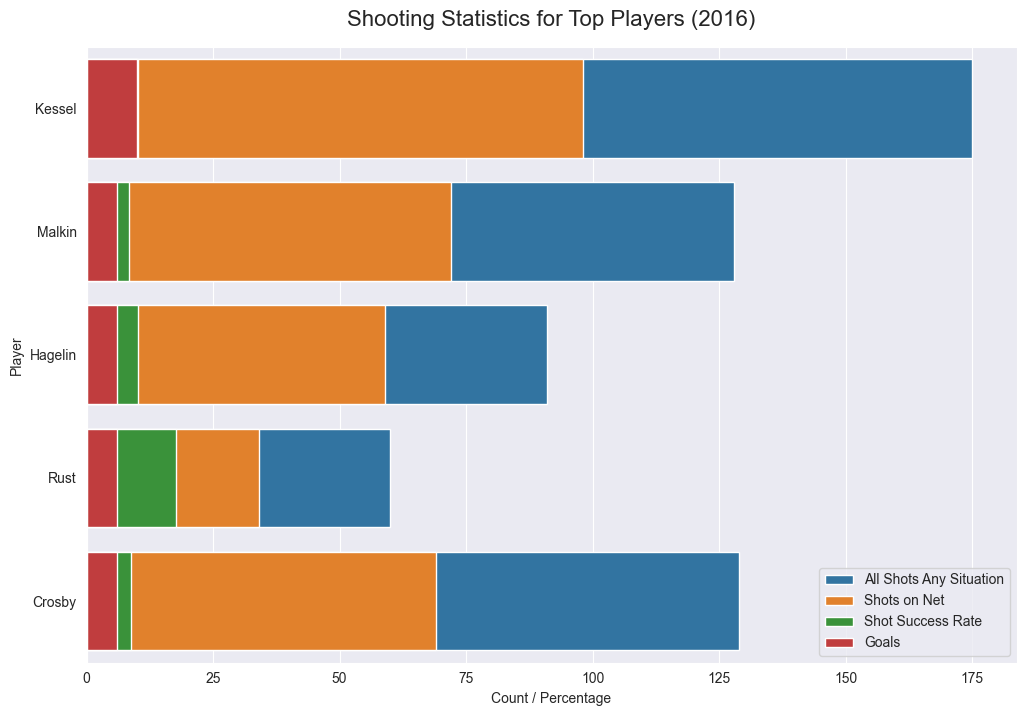

In [70]:
#sort the DataFrame by shots made
shooting_stats_2016_sorted = shooting_stats_2016.sort_values(by='goals', ascending=False)

#select the top 5 players
top_players = shooting_stats_2016_sorted.head(5)

plt.figure(figsize=(12, 8))

sns.barplot(x='SAtt.', y='lastName', data=top_players, label='All Shots Any Situation')
sns.barplot(x='shots', y='lastName', data=top_players, label='Shots on Net')
sns.barplot(x='shot_success_rate', y='lastName', data=top_players, label='Shot Success Rate')
sns.barplot(x='goals', y='lastName', data=top_players, label='Goals')


plt.xlabel('Count / Percentage')
plt.ylabel('Player')
plt.title('Shooting Statistics for Top Players (2016)', fontsize=16, y=1.02)
plt.legend()
plt.show()

This graph shows that although Phil Kessel far out-shot anyone else on the team, his shot success rate was lower than Cullen, Rust, and Sheary. He made the most goals this season, but this seems due to simply making the most shots. 

It's an interesting player comparison to someone like Bryan Rust, who took very few shots but had by far the highest shot success rate. 

As they say in hockey, you miss all of the shots you don't take. So although Kessel's success rate is smaller, simply making massive amounts of shots proves a valid strategy for success.

#### Take a moment to consider Thru%

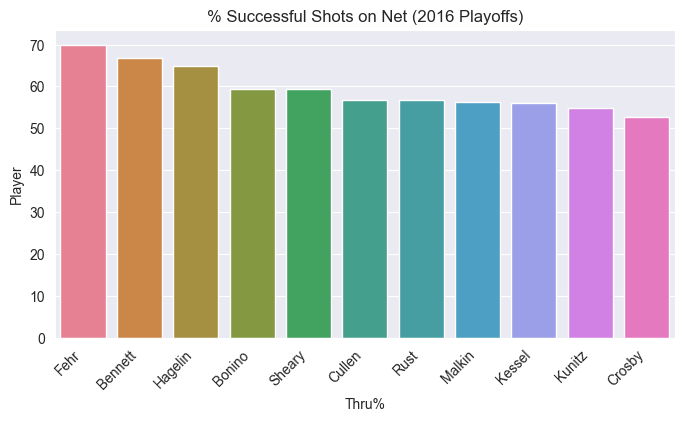

In [53]:
#sort the DataFrame by the number of assists
Thru_stats = pens_player_stats_2016.sort_values(by='Thru%', ascending=False)
selected_positions = ['C', 'LW', 'RW']
Thru_stats_filtered = Thru_stats[Thru_stats['Pos'].isin(selected_positions)]


plt.figure(figsize=(8, 4))
sns.barplot(x='lastName', y='Thru%', data=Thru_stats_filtered, hue='lastName')

plt.title('% Successful Shots on Net (2016 Playoffs)')
plt.xlabel('Thru%')
plt.ylabel('Player')
plt.xticks(rotation=45, ha='right')
plt.show()

The analysis of Thru% among the forwards on the team offers a nuanced perspective on player performance, challenging the notion that the best players consistently exhibit the highest Thru%. In fact, the strongest team players rank at the bottom of the list.

 While some star players demonstrate impressive Thru% figures, other forwards who may not be as prominently recognized also contribute significantly in this aspect of the game. Hagelin and Bonino boast the 2nd and 3rd best Thru% of the forwards, respectively. 
 

#### Goals are more than just the scorer. How do the players rank on assists?

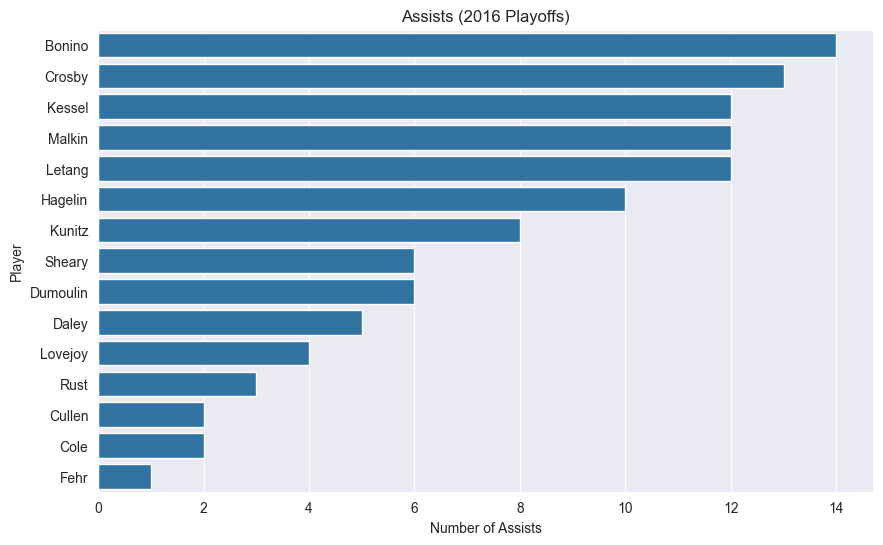

In [71]:
#sort the DataFrame by the number of assists
pens_player_stats_2016 = pens_player_stats_2016.sort_values(by='assists', ascending=False)

#plot
plt.figure(figsize=(10, 6))
sns.barplot(x='assists', y='lastName', data=pens_player_stats_2016)

plt.title('Assists (2016 Playoffs)')
plt.xlabel('Number of Assists')
plt.ylabel('Player')
plt.show()

Two of the three members of the HBK Line fall in the top 5. It makes sense that either Bonino or Hagelin would have the most assists, given that Kessel had the most goals during this playoff season. 

It seems, given all we've seen so far, that this line could have operated as: 
- Hagelin committing more hits, creating space on the ice for productive plays
- Bonino making good passes
- Kessel firing the shots in

Also worth noting is the extremely high number of assists for Sidney Crosby, ranked second above. This suggests that it might be more logical to compare him to another center (Bonino), than to Kessel, with regard to goals. 

## CORSI and Fenwick are two common ways to measure player success. 
### Below, we look at the CORSI For % (CF%) and Fenwick For % (FF%):


**Corsi For (CF)** represents the total number of shot attempts (shots on goal, missed shots, and blocked shots) generated by a team or player while they are on the ice.
It is an indicator of offensive activity and measures how often a team or player is involved in offensive plays.


**Corsi Against (CA)** represents the total number of shot attempts (shots on goal, missed shots, and blocked shots) faced by a team or player while they are on the ice.
It is an indicator of defensive activity and measures how often a team or player is defending against shot attempts from the opposing team.

**CF% = CF/(CF+CA)** - above a 50% in this category indicates that when this player was on the ice, the team controlled the puck more often than not.



**Fenwick For (FF)** represents the total number of unblocked shot attempts (shots on goal and missed shots) generated by a team or player while they are on the ice.
FF does not include blocked shots in the count, focusing on shots that reach the net or miss the net entirely.


**Fenwick Against (FA)** represents the total number of unblocked shot attempts (shots on goal and missed shots) faced by a team or player while they are on the ice.
Similar to FF, FA excludes blocked shots, providing a measure of defensive activity without considering shots that were blocked by the opposing team.

**FF% = FF/(FF+FA)** - above a 50% in this category indicates that when this player was on the ice, the team controlled the puck more often than not.


In [55]:
#isolate these metrics
Corsi_Fenwick_stats_2016 = pens_player_stats_2016[['lastName','CF%', 'FF%']].sort_values(by='CF%', ascending=False)

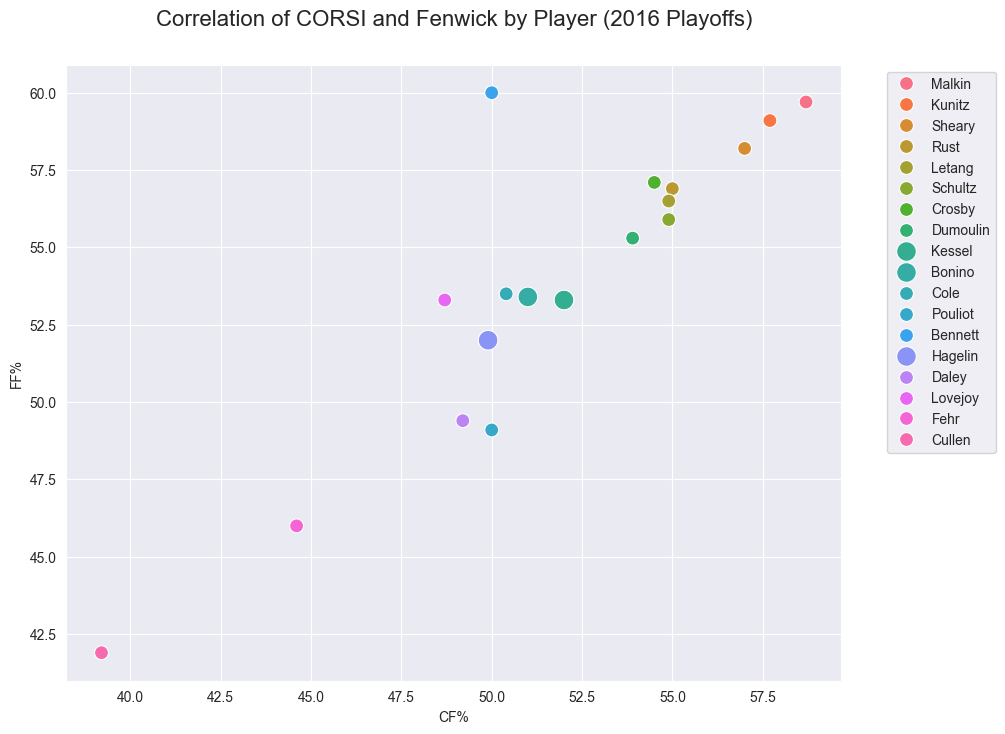

In [56]:
#emphasize the HBK Line
players_to_enlarge = ['Hagelin', 'Bonino', 'Kessel']

#create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='CF%', y='FF%', data=Corsi_Fenwick_stats_2016, hue='lastName', size='lastName',
                sizes={player: 200 if player in players_to_enlarge else 100 for player in Corsi_Fenwick_stats_2016['lastName']})



plt.title('Correlation of CORSI and Fenwick by Player (2016 Playoffs)', fontsize=16, y=1.05)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('CorsiFenwick2016.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

As seen, there is a very strong (likely linear) relationship between CORSI and Fenwick scores. 

Given the fans' obsession with the HBK line, I would have expected the players to be located in the upper right quadrant of the graph. Contrastingly, they can all be found relatively in the middle of the graph and ranked below the top 50% of the team as a whole. 

Malkin, Kunitz, and Sheary scored the highest with both metrics, clearly contributing to the team's strong possession of the puck.

The outlier here seems to be Bennett, with a much higher FF% relative to his CF%, indicating that, for whatever reason, more of his shots were blocked than from other teammates. For a future project, it might be interesting to investigate what else is happening on the ice for players with divergent CF% and FF%.

## "Puck Luck"

**PDO, often referred to as "Puck Luck,"** is a composite statistic in hockey analytics that combines a team's on-ice shooting percentage (oiSh%) and save percentage (oiSv%) in order to assess a team's overall efficiency in converting scoring chances into goals. The term "PDO" itself doesn't stand for anything specific; it's just a name given to this combined metric.

The formula for PDO is:

PDO = Shooting Percentage + Save Percentage


Here's a breakdown of the components:



**Shooting Percentage (oiSH%)** represents the proportion of shots on goal that result in goals. It is calculated as the number of goals scored divided by the number of shots on goal.

-   Shooting Percentage (Sh%) = (Goals / Shots on Goal) * 100


**Save Percentage (oiSV%)** represents the proportion of shots on goal that are stopped by the goaltender. It is calculated as the number of saves divided by the number of shots on goal faced by the goaltender.

-   Save Percentage (Sv%) = (Saves / Shots on Goal Faced) * 100

By combining Shooting Percentage and Save Percentage, PDO aims to capture the overall randomness and variability in a team's performance that may not be entirely within their control. A high PDO may indicate that a team is experiencing above-average luck, while a low PDO may suggest below-average luck. Over the long term, teams are generally expected to regress towards an average PDO of around 100.

It's important to note that while PDO can provide insights into short-term luck or variance, it is not necessarily a predictive metric for long-term team success. Teams with consistently high PDO may be benefiting from luck, but sustained success often requires strong underlying performance in other aspects of the game.

In [57]:
#isolate PDO variables
puck_luck_2016 = pens_player_stats_2016[['lastName','oiSH%', 'oiSV%','PDO']].sort_values(by='PDO', ascending=False)

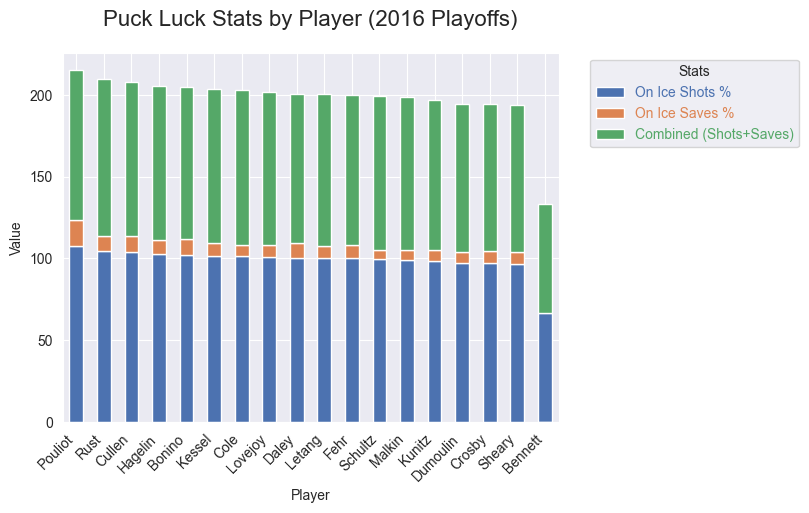

In [73]:
#melt the dF for easier analysis
puck_luck_2016_melted = pd.melt(puck_luck_2016, id_vars='lastName')

#pivot the DataFrame for a stacked bar graph
df_puck_luck_pivoted = puck_luck_2016_melted.pivot(index='lastName', columns='variable', values='value')

#sort the DataFrame by the 'PDO' column in descending order
df_puck_luck_pivoted = df_puck_luck_pivoted.sort_values(by='PDO', ascending=False)

#plot
ax = df_puck_luck_pivoted.plot(kind='bar', stacked=True)

plt.title('Puck Luck Stats by Player (2016 Playoffs)', fontsize=16, y=1.05)
plt.xlabel('Player')
plt.ylabel('Value')

#customize legend labels
legend_labels = {'oiSH%': 'On Ice Shots %', 'oiSV%': 'On Ice Saves %', 'PDO': 'Combined (Shots+Saves)'}
handles, _ = ax.get_legend_handles_labels()

#create a separate legend
legend = plt.legend(handles=handles, labels=[legend_labels[label] for label in puck_luck_2016_melted['variable'].unique()],
                    title='Stats', loc='upper left', bbox_to_anchor=(1.05, 1))

#adjust legend color
for handle, label in zip(legend.legend_handles, legend.get_texts()):
    label.set_color(handle.get_facecolor())

#rotate x-axis labels at 45 degrees
plt.xticks(rotation=45, ha='right')

plt.show()

In the 2016 Playoffs, our HBK line members secured positions in the 3rd, 4th, and 5th spots for PDO. 

The minimal differentials between these players makes it challenging to pinpoint individual contributions to an overarching metric like PDO. 

This observation underscores the collaborative nature of the sport, where team dynamics and interdependencies significantly influence overall performance.

#### Just for fun, let's look at this same graph, but just for Forwards; players that are Center (C), Left Wing (LW), or Right Wing (RW)

In [59]:
puck_luck_forwards_2016 = pens_player_stats_2016[['lastName','oiSH%', 'oiSV%','PDO', 'Pos']].sort_values(by='PDO', ascending=False)

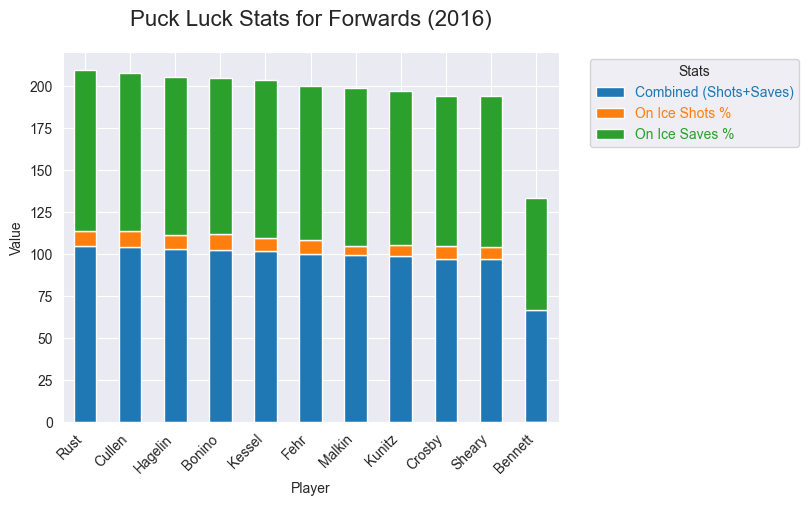

In [74]:
selected_positions = ['C', 'LW', 'RW']
puck_luck_2016_filtered = puck_luck_forwards_2016[puck_luck_forwards_2016['Pos'].isin(selected_positions)]
#melt the DataFrame
puck_luck_2016_melted = pd.melt(puck_luck_2016_filtered, id_vars='lastName', var_name='variable', value_name='value')
#create a pivot table for a stacked bar graph
df_puck_luck_pivoted = puck_luck_2016_melted[puck_luck_2016_melted['variable'] != 'Pos'].pivot_table(
    index='lastName', columns='variable', values='value', aggfunc='sum')
#sort the DataFrame by the 'PDO' column in descending order
df_puck_luck_pivoted = df_puck_luck_pivoted.sort_values(by='PDO', ascending=False)

ax = df_puck_luck_pivoted.plot(kind='bar', stacked=True)
plt.title('Puck Luck Stats for Forwards (2016)', fontsize=16, y=1.05)
plt.xlabel('Player')
plt.ylabel('Value')

#customize legend labels and create
legend_labels = {'oiSH%': 'On Ice Shots %', 'oiSV%': 'On Ice Saves %', 'PDO': 'Combined (Shots+Saves)'}
handles, _ = ax.get_legend_handles_labels()
legend = plt.legend(handles=handles, labels=[legend_labels[label] for label in df_puck_luck_pivoted.columns],
                    title='Stats', loc='upper left', bbox_to_anchor=(1.05, 1))
for handle, label in zip(legend.legend_handles, legend.get_texts()):
    label.set_color(handle.get_facecolor())

#rotate x-axis labels at 45 degrees
plt.xticks(rotation=45, ha='right')
plt.show()

Although the stats are still very close, it's easier to see players of interest here. 

One thing to consider: although Malkin, Kunitz, and Sheary ranked at the top for FF% and CF%, they are all ranked lower than our HBK line members in PDO scores.

## Plus / Minus

PlusMinus, or +/- indicates the relationship between goals scored for the team, vs goals scored against the team. 

There is debate regarding the value, and yet this metric is commonly used in all of hockey analytics. 

The easiest way to consider player +/- is with visualizations:

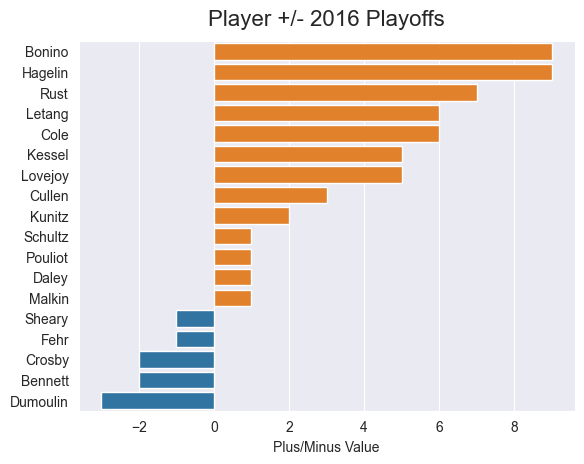

In [61]:
sns.barplot(x='plusMinus', y='lastName', data=pens_player_stats_2016, orient='h', hue=pens_player_stats_2016['plusMinus'] >= 0, order=pens_player_stats_2016.sort_values('plusMinus', ascending=False)['lastName'])
plt.xlabel('Plus/Minus Value')
plt.ylabel('')
plt.title('Player +/- 2016 Playoffs', fontsize=16, y=1.02)
plt.legend().set_visible(False)
plt.show()

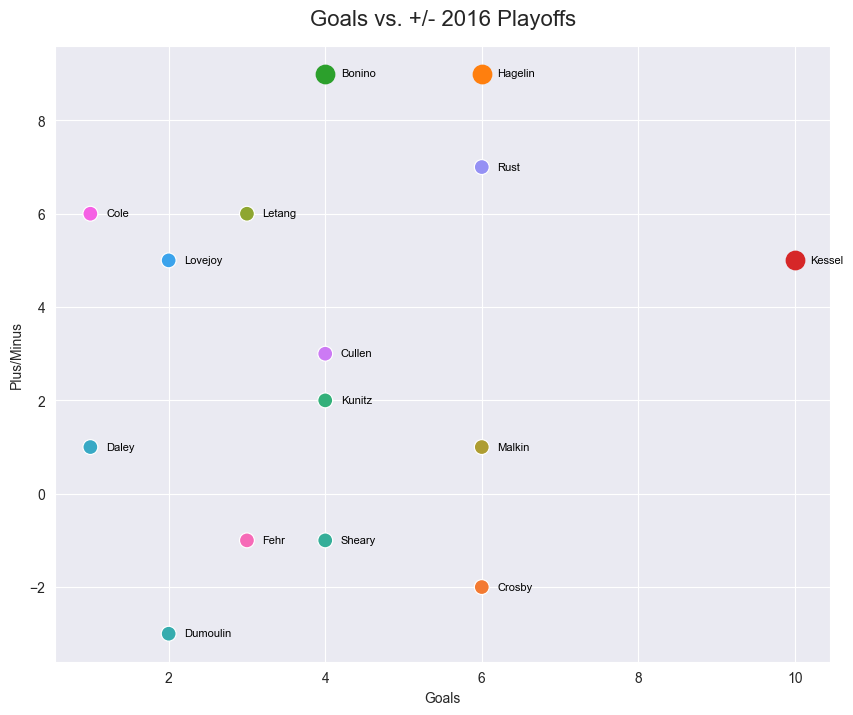

In [75]:
players_to_enlarge = ['Hagelin', 'Bonino', 'Kessel']


plt.figure(figsize=(10, 8))

scatter_plot = sns.scatterplot(
    data=pens_player_stats_2016,
    x='goals',
    y='plusMinus',
    hue='lastName',
    s=115,
    legend=False  
)

#emphasis on HBK Line
for player in players_to_enlarge:
    subset = pens_player_stats_2016[pens_player_stats_2016['lastName'] == player]
    scatter_plot.scatter(subset['goals'], subset['plusMinus'], s=175, label=player)

#annotate dots with all player names
for i, player_row in pens_player_stats_2016.iterrows():
    scatter_plot.text(
        player_row['goals'] + 0.2,  
        player_row['plusMinus'] - 0.1,  
        player_row['lastName'],
        ha='left',
        va='bottom',
        fontsize=8,  
        color='black'  
    )

plt.xlabel('Goals')
plt.ylabel('Plus/Minus')
plt.title('Goals vs. +/- 2016 Playoffs', size=16, y=1.02)
plt.show()

For the 2016 Playoffs, all three members of the HBK line are ranked highly on the +/- scale.

However, it is surprsing that Bonino and Hagelin ranked so much higher than Kessel, given that Kessel was the highest scorer this year. Perhaps it is connected with power plays/penalty kills; Kessel potentially played in more PKs, thus increasing his chances of getting scored on.

Either way, it's interesting to note that Crosby has a negative +/- this year, far below Kessel or any other top players.

## No way around it: goals are important

### Looking at goals for the entire 2016 playoffs vs. average ice time per player:

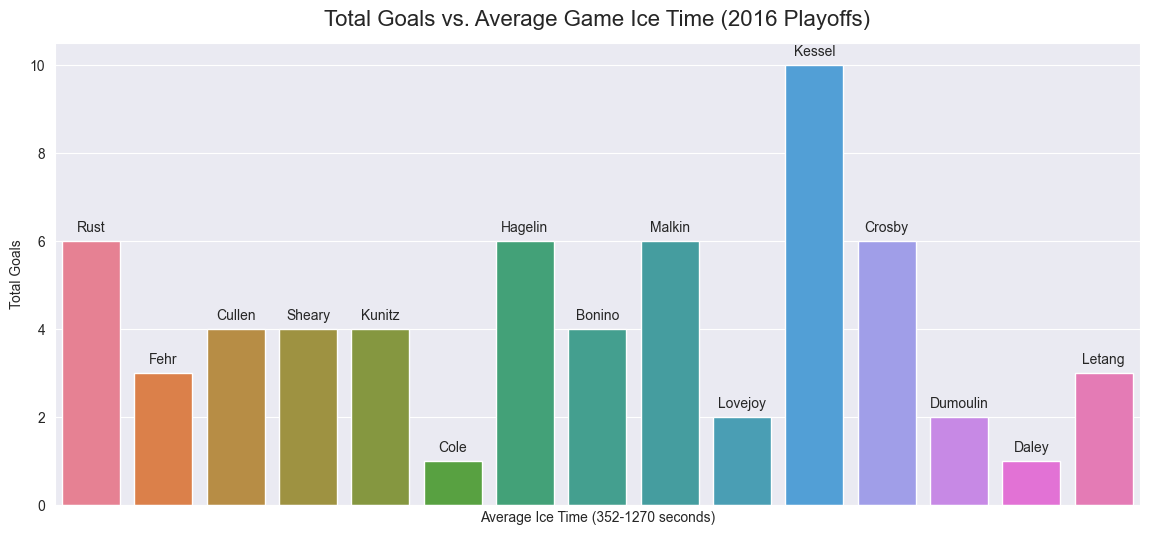

In [76]:
plt.figure(figsize=(14, 6))
#create the bar plot
ax = sns.barplot(data=pens_player_stats_2016, x='timeOnIce', y='goals', hue='lastName', dodge=False)

#get legend handles and labels
handles, labels = ax.get_legend_handles_labels()

#annotate each bar with player name
for p, player_name in zip(ax.patches, labels):
    ax.annotate(player_name, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Average Ice Time (352-1270 seconds)')
plt.ylabel('Total Goals')
plt.title('Total Goals vs. Average Game Ice Time (2016 Playoffs)', fontsize=16, y=1.02)
plt.xticks([])  
plt.legend().set_visible(False)  
plt.show()

As seen above, there appears to be a correlation between ice time and goals. A notable exception would be Rust, who has very little average ice time, and significant goals. This is in line with what we saw earlier with Rust's shot success rate being exceptionally high.

Take note that Crosby has more ice time and far fewer goals than Kessel, as well as Malkin having more ice time and equal goals as Hagelin.

It's a rough comparison, since Defense players spend much more time on the ice overall. Let's look at this graph with only Forwards: 



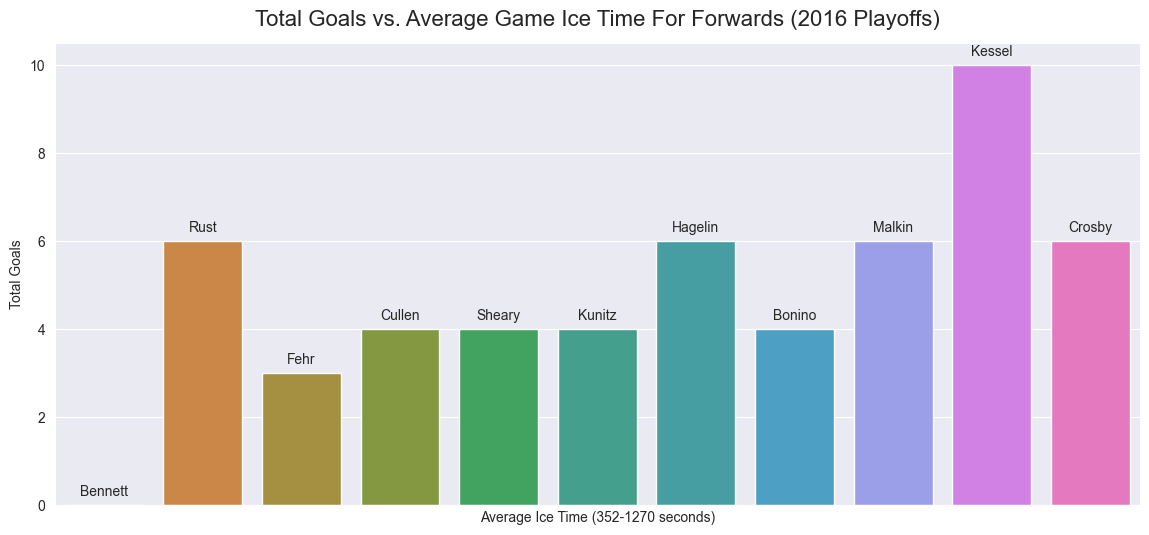

In [64]:
selected_positions = ['C', 'LW', 'RW']
filtered_data = pens_player_stats_2016[pens_player_stats_2016['Pos'].isin(selected_positions)]

plt.figure(figsize=(14, 6))
#create the bar plot
ax = sns.barplot(data=filtered_data, x='timeOnIce', y='goals', hue='lastName', dodge=False, err_kws={'color': 'None'})

#get legend handles and labels
handles, labels = ax.get_legend_handles_labels()

#annotate each bar with player name
for p, player_name in zip(ax.patches, labels):
    ax.annotate(player_name, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Average Ice Time (352-1270 seconds)')
plt.ylabel('Total Goals')
plt.title('Total Goals vs. Average Game Ice Time For Forwards (2016 Playoffs)', fontsize=16, y=1.02)
plt.xticks([])  
plt.legend().set_visible(False)  
plt.show()

The relationship between ice time and goals is more apparent, indicating that Kessel is somewhat of an outlier. This could point to his notable achievement this year.

### Visualizing player goals as a percent of the whole, with a focus on Hagelin, Bonino and Kessel:

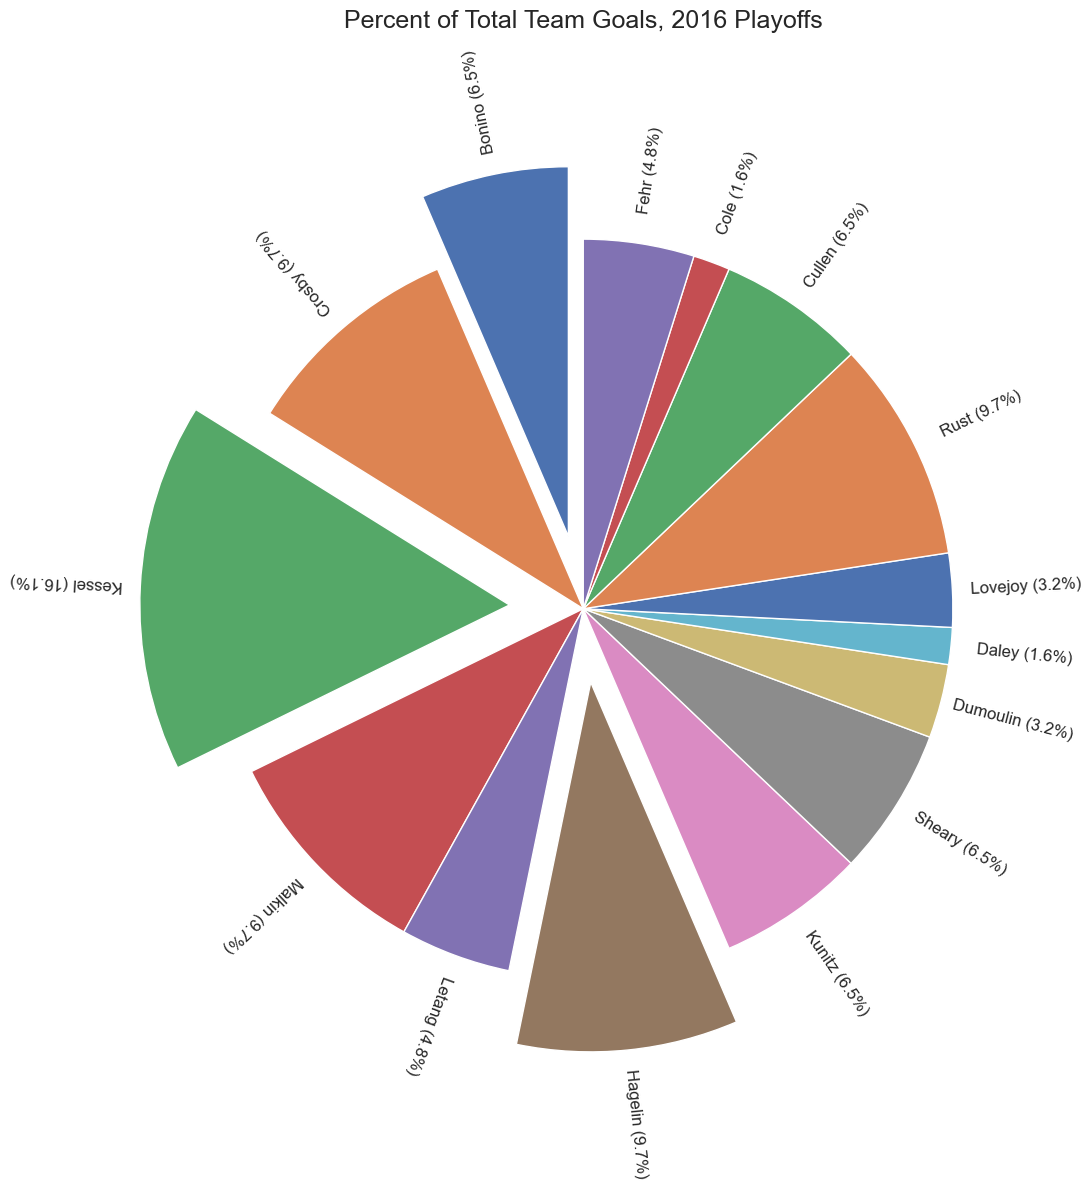

In [65]:
#filter players with non-zero goals
pens_player_stats_2016 = pens_player_stats_2016[pens_player_stats_2016['goals'] > 0]

labels = pens_player_stats_2016['lastName']
sizes = pens_player_stats_2016['goals']
colors = sns.color_palette("deep")
#sort by 'goals' in descending order
pens_player_stats_2016 = pens_player_stats_2016.sort_values(by='goals', ascending=False)
#define explode for specific slices
explode = [0.2 if label in ['Bonino', 'Hagelin', 'Kessel'] else 0 for label in labels]

plt.figure(figsize=(12, 12))
#draw pie chart without autopct labels
patches, _ = plt.pie(sizes, labels=None, startangle=90, colors=colors, explode=explode)

#calculate and display percentage labels
for i, (label, size) in enumerate(zip(labels, sizes)):
    angle = (patches[i].theta1 + patches[i].theta2) / 2
    x = patches[i].center[0] + patches[i].r * 1.2 * np.cos(np.radians(angle))
    y = patches[i].center[1] + patches[i].r * 1.2 * np.sin(np.radians(angle))
    
    #calculate percentage
    percentage = (size / sizes.sum()) * 100
    
    plt.text(x, y, f'{label} ({percentage:.1f}%)', ha='center', va='center', rotation=angle, fontsize=12)

plt.title('Percent of Total Team Goals, 2016 Playoffs', fontsize=18, y=1.12)
plt.savefig('PercentTotalGoals2016.png')
plt.show()

#### As the pie chart shows, the HBK line accounted for nearly 1/3 of all goals for the 2016 playoffs (32.3%). 
This is impressive since they are three people out of a team of 22 (14%). 

To compare:
- the first line (Crosby, Sheary, Hornqvist) accounted for 16.2% of the goals
- the second line (Malkin, Rust, Kunitz) accounted for 25.9% of the goals

Using goals alone as a metric, it is clear that the HBK line had a heavy hand in the Penguins Stanley Cup win in 2016.


## Conclusion

The analysis of the HBK line's performance during the 2016 playoffs provides a comprehensive understanding of their impact on the Pittsburgh Penguins' success in winning the Stanley Cup. Notably, Nick Bonino's consistent faceoff differentials and Phil Kessel's impressive number of shots taken highlight their pivotal roles. The line's balance is evident in Phil Kessel's dominant offensive contributions, Carl Hagelin's physical presence, and Bonino's shot-blocking proficiency.

Examining advanced metrics, the HBK line's Thru%, Corsi, and Fenwick metrics challenge traditional expectations, emphasizing the nuanced contributions of less-recognized players. Despite the team's fanfare for the HBK line, their positioning in puck possession metrics reveals the multifaceted nature of player roles.

In scoring, the HBK line's prowess is evident, with Kessel's goal-scoring, Bonino's playmaking, and Hagelin's utility contributing significantly. The line's positive impact on goals, PDO, and +/- further cements their importance, accounting for nearly one-third of all goals during the playoffs.

The HBK line's exceptional performance challenges conventional expectations, showcasing the synergy of their individual skills and collective contributions. Their significant role in the Penguins' 2016 Stanley Cup victory underscores the importance of well-balanced lines and the unpredictable nature of player impact in hockey.